# Problem Statement
# To Predict Flight Price.

**This can assist airlines in determining what rates they can keep.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

## Importing dataset

1. Since data is in form of excel file we have to use pandas read_excel to load the data
2. After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row
3. Check whether any null values are there or not. if it is present then following can be done,
    1. Imputing data using Imputation method in sklearn
    2. Filling NaN values with mean, median and mode using fillna() method
4. Describe data --> which can give statistical analysis

In [2]:
train_data = pd.read_excel(r"Data_Train.xlsx")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data.dropna(inplace = True)

In [8]:
train_data.shape

(10682, 11)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Statistical Discription

In [10]:
train_data.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [11]:
train_data.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10682,10682,10682,10682,10682,10682,10682,10682,10682,10682,10682.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4536,4536,2376,233,423,550,5625,8344,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.214567
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.548810
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


---

## EDA

**From description we can see that Date_of_Journey is a object data type,\
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction**



**For this we require pandas **to_datetime** **to convert object data type to datetime dtype.**


**.dt.day method will extract only day of that date**

**dt.month method will extract only month of that date**

In [12]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [13]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [14]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [15]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [16]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

In [17]:
# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [18]:
train_data

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,1,3,11,30


In [19]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [20]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


# transform 'Duration' column

In [21]:
duration = list(train_data["Duration"])

In [22]:
duration

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [23]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time
# Assigning and converting Duration column into list

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
#             print('Hour ',duration)
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour
#             print('Minutes \n',duration)

In [24]:
for i in range(len(duration)):
#     if len(duration[i].split()) != 2:
        print(duration[i])

2h 50m
7h 25m
19h 0m
5h 25m
4h 45m
2h 25m
15h 30m
21h 5m
25h 30m
7h 50m
13h 15m
2h 35m
2h 15m
12h 10m
2h 35m
26h 35m
4h 30m
22h 35m
23h 0m
20h 35m
5h 10m
15h 20m
2h 50m
2h 55m
13h 20m
15h 10m
5h 45m
5h 55m
2h 50m
2h 15m
2h 15m
13h 25m
2h 50m
22h 0m
5h 30m
10h 25m
5h 15m
2h 30m
6h 15m
11h 55m
11h 5m
8h 30m
22h 5m
2h 45m
12h 0m
2h 50m
2h 50m
2h 15m
16h 5m
19h 55m
3h 15m
25h 20m
2h 50m
3h 0m
2h 50m
16h 15m
15h 5m
2h 15m
6h 30m
25h 5m
12h 25m
27h 20m
10h 15m
10h 30m
2h 15m
10h 25m
2h 50m
1h 30m
13h 20m
2h 15m
1h 25m
26h 30m
7h 20m
13h 30m
5h 0m
2h 45m
2h 50m
1h 30m
19h 5m
2h 15m
14h 50m
2h 40m
22h 10m
9h 35m
10h 0m
21h 20m
5h 25m
18h 45m
12h 20m
18h 0m
9h 15m
11h 5m
17h 30m
13h 20m
2h 35m
2h 25m
2h 40m
3h 0m
1h 25m
16h 35m
12h 20m
12h 15m
7h 30m
24h 0m
2h 45m
8h 55m
7h 10m
14h 30m
30h 20m
19h 55m
15h 0m
2h 55m
12h 45m
10h 10m
5h 55m
15h 25m
16h 5m
10h 10m
2h 40m
11h 55m
2h 40m
1h 25m
14h 5m
20h 15m
2h 25m
23h 10m
18h 10m
16h 0m
2h 50m
2h 20m
8h 0m
16h 55m
3h 10m
2h 45m
14h 0m
23h 50m
21h 4

10h 35m
10h 45m
10h 15m
17h 10m
12h 30m
8h 0m
11h 5m
2h 55m
1h 30m
10h 55m
2h 30m
24h 20m
2h 55m
1h 30m
13h 15m
4h 40m
13h 0m
16h 0m
17h 25m
12h 10m
9h 30m
10h 0m
1h 20m
8h 0m
5h 55m
23h 40m
24h 55m
7h 30m
26h 55m
12h 10m
6h 40m
14h 20m
5h 35m
1h 30m
2h 50m
18h 30m
9h 20m
18h 10m
2h 55m
2h 50m
8h 50m
13h 20m
29h 50m
23h 50m
5h 55m
10h 25m
10h 40m
2h 50m
7h 20m
12h 15m
9h 30m
2h 35m
13h 20m
9h 30m
10h 0m
10h 30m
28h 30m
5h 35m
3h 5m
24h 40m
13h 30m
5h 50m
12h 35m
19h 40m
27h 35m
4h 35m
10h 25m
2h 40m
1h 30m
6h 30m
2h 35m
12h 10m
2h 35m
11h 5m
9h 35m
2h 35m
1h 30m
11h 0m
6h 35m
3h 15m
26h 10m
7h 40m
27h 10m
12h 30m
12h 45m
9h 40m
26h 10m
17h 35m
24h 40m
13h 10m
15h 20m
2h 35m
11h 5m
19h 20m
2h 50m
12h 0m
23h 0m
1h 30m
8h 0m
2h 50m
4h 50m
2h 50m
2h 35m
3h 0m
2h 50m
2h 20m
17h 5m
2h 50m
1h 25m
9h 50m
1h 30m
13h 20m
15h 40m
27h 0m
3h 0m
23h 55m
9h 50m
13h 20m
8h 45m
4h 55m
7h 45m
11h 5m
2h 35m
1h 30m
12h 0m
2h 50m
15h 25m
13h 15m
1h 30m
22h 5m
11h 45m
7h 30m
15h 35m
11h 0m
9h 15m
2h 30m
22h

7h 50m
2h 45m
2h 30m
16h 15m
15h 40m
18h 20m
16h 15m
19h 5m
9h 30m
5h 0m
19h 15m
27h 35m
14h 35m
4h 40m
13h 25m
7h 35m
14h 0m
2h 45m
18h 25m
21h 25m
6h 35m
11h 0m
1h 30m
5h 20m
3h 0m
28h 5m
2h 40m
2h 15m
1h 15m
24h 15m
9h 20m
2h 40m
3h 0m
3h 0m
2h 45m
5h 45m
15h 0m
23h 50m
2h 50m
16h 5m
9h 5m
23h 15m
21h 15m
11h 5m
22h 0m
2h 45m
31h 30m
1h 25m
19h 55m
5h 5m
6h 15m
5h 55m
2h 55m
21h 35m
15h 10m
25h 30m
17h 5m
2h 35m
25h 40m
5h 45m
3h 5m
9h 5m
8h 0m
5h 50m
13h 25m
2h 20m
9h 30m
27h 10m
2h 40m
20h 10m
21h 10m
2h 50m
24h 0m
15h 15m
10h 30m
4h 50m
6h 5m
2h 55m
21h 35m
9h 20m
27h 20m
2h 35m
5h 15m
4h 35m
7h 30m
2h 45m
24h 30m
7h 15m
11h 55m
8h 10m
15h 40m
10h 30m
1h 25m
10h 35m
4h 55m
21h 45m
24h 5m
2h 35m
2h 35m
10h 55m
6h 20m
7h 30m
2h 45m
22h 55m
2h 50m
2h 55m
2h 45m
3h 0m
11h 40m
26h 15m
27h 0m
11h 5m
25h 45m
1h 25m
21h 25m
1h 25m
12h 20m
5h 30m
20h 35m
9h 15m
6h 30m
2h 55m
13h 50m
22h 45m
14h 35m
3h 5m
2h 20m
6h 55m
19h 55m
18h 45m
2h 50m
13h 25m
2h 55m
2h 55m
2h 45m
5h 45m
14h 45m
2h 2

8h 0m
6h 10m
21h 40m
15h 20m
9h 45m
23h 50m
13h 25m
14h 5m
13h 0m
2h 35m
3h 15m
9h 30m
32h 5m
2h 30m
2h 30m
23h 0m
15h 30m
11h 35m
23h 0m
2h 35m
1h 30m
8h 35m
2h 55m
2h 45m
17h 15m
2h 50m
3h 0m
20h 20m
15h 40m
2h 50m
1h 30m
2h 15m
32h 30m
14h 10m
9h 35m
20h 10m
7h 30m
4h 5m
11h 15m
2h 45m
2h 35m
9h 20m
2h 35m
8h 10m
2h 55m
8h 20m
2h 35m
3h 0m
4h 55m
5h 0m
8h 55m
6h 25m
5h 0m
24h 5m
3h 0m
2h 30m
20h 10m
15h 30m
1h 30m
1h 20m
1h 20m
2h 35m
1h 30m
3h 5m
2h 55m
4h 25m
2h 50m
38h 0m
12h 55m
9h 20m
11h 25m
2h 55m
6h 5m
2h 35m
2h 50m
20h 45m
7h 5m
15h 0m
14h 5m
23h 15m
14h 50m
26h 35m
9h 0m
2h 45m
18h 10m
2h 15m
13h 20m
9h 20m
26h 45m
3h 5m
2h 35m
2h 30m
9h 40m
5h 15m
2h 40m
12h 45m
2h 45m
19h 55m
11h 15m
25h 20m
2h 50m
2h 55m
2h 20m
15h 10m
26h 20m
9h 5m
2h 50m
10h 25m
6h 25m
15h 5m
13h 30m
27h 35m
4h 25m
14h 30m
23h 40m
24h 0m
13h 20m
2h 45m
1h 30m
2h 50m
25h 30m
11h 50m
28h 0m
17h 15m
10h 0m
2h 20m
2h 50m
12h 45m
12h 25m
2h 35m
8h 20m
2h 25m
15h 10m
5h 30m
13h 30m
5h 20m
10h 40m
17h 5m
9h 

27h 10m
2h 55m
4h 50m
2h 25m
20h 0m
2h 35m
23h 10m
10h 10m
1h 30m
10h 25m
5h 35m
9h 0m
17h 45m
11h 15m
6h 15m
13h 30m
26h 35m
9h 0m
2h 40m
7h 35m
14h 45m
6h 10m
2h 45m
7h 40m
1h 30m
14h 25m
11h 30m
3h 15m
8h 30m
2h 15m
2h 45m
4h 30m
3h 40m
14h 0m
1h 30m
9h 25m
2h 15m
2h 55m
13h 20m
2h 20m
6h 40m
11h 45m
4h 55m
8h 35m
16h 5m
5h 5m
6h 5m
6h 25m
9h 50m
1h 20m
19h 25m
9h 20m
16h 45m
8h 5m
2h 50m
17h 25m
2h 15m
19h 55m
14h 20m
6h 15m
12h 0m
5h 15m
22h 55m
3h 0m
13h 15m
26h 0m
26h 0m
15h 30m
3h 0m
2h 30m
24h 0m
20h 55m
22h 0m
2h 40m
9h 35m
3h 0m
2h 45m
8h 0m
15h 0m
37h 25m
13h 20m
11h 50m
9h 45m
2h 20m
2h 50m
2h 50m
33h 15m
17h 45m
13h 50m
4h 30m
2h 50m
13h 50m
2h 25m
2h 40m
13h 55m
9h 10m
13h 25m
14h 35m
2h 55m
18h 45m
5h 55m
26h 30m
8h 40m
12h 10m
2h 40m
23h 15m
12h 25m
3h 0m
13h 55m
14h 5m
3h 0m
3h 10m
2h 50m
4h 35m
11h 55m
5h 40m
11h 45m
6h 10m
13h 50m
11h 25m
20h 20m
3h 0m
3h 10m
23h 40m
9h 35m
13h 45m
12h 45m
6h 25m
13h 50m
2h 35m
2h 20m
2h 45m
6h 35m
1h 15m
3h 0m
13h 25m
12h 35m
24h 3

In [25]:
# for i in range(len(duration)):
#     if len(duration[i].split()) != 2

In [26]:
train_data['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [27]:
duration

['2h 50m',
 '7h 25m',
 '19h 0m',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h 0m',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h 0m',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h 0m',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h 0m',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h 0m',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h 0m',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 

In [28]:
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [29]:
duration[0].split(sep='h')
#index position 0 , integer part is extracted

['2', ' 50m']

In [30]:
duration[1].split(sep='m')[0].split()[-1]
#extract minutes 

'25'

In [31]:
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min'],
      dtype='object')

In [32]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [33]:
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

In [34]:
train_data.drop(["Duration"], axis = 1, inplace = True)

In [35]:
train_data.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0


In [36]:
train_data.shape

(10682, 15)

---

## Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,
1. <span style="color: blue;">**Nominal data**</span> --> data are not in any order --> <span style="color: green;">**OneHotEncoder**</span> is used in this case
2. <span style="color: blue;">**Ordinal data**</span> --> data are in order --> <span style="color: green;">**LabelEncoder**</span> is used in this case

In [37]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [38]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [39]:
# train_data.loc["Airline"=='Trujet']

In [40]:
# train_data.drop([train_data['Airline'] == 'Trujet'],inplace=True,axis=1)
train_data = train_data[train_data.Airline != 'Trujet']

In [41]:
train_data.shape

(10681, 15)

In [42]:
train_data.reset_index(drop=True)  

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10677,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10678,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10679,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40


In [43]:
train_data.shape

(10681, 15)

In [44]:
train_data.sort_values('Price',ascending=False)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
2924,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1 stop,Business class,79512,1,3,5,45,11,25,5,40
5372,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1 stop,Business class,62427,1,3,5,45,12,25,6,40
10364,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,1 stop,Business class,57209,1,3,9,45,14,25,4,40
5439,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,54826,1,3,16,55,23,0,6,5
1478,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,54826,18,3,18,40,0,45,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,Jet Airways,Mumbai,Hyderabad,BOM → HYD,non-stop,In-flight meal not included,1840,27,3,2,55,4,25,1,30
4839,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,1759,3,4,22,45,0,15,1,30
4066,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,1759,21,3,22,45,0,10,1,25
10513,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,1759,27,3,5,45,7,5,1,20


# Plot of Airline vs Price

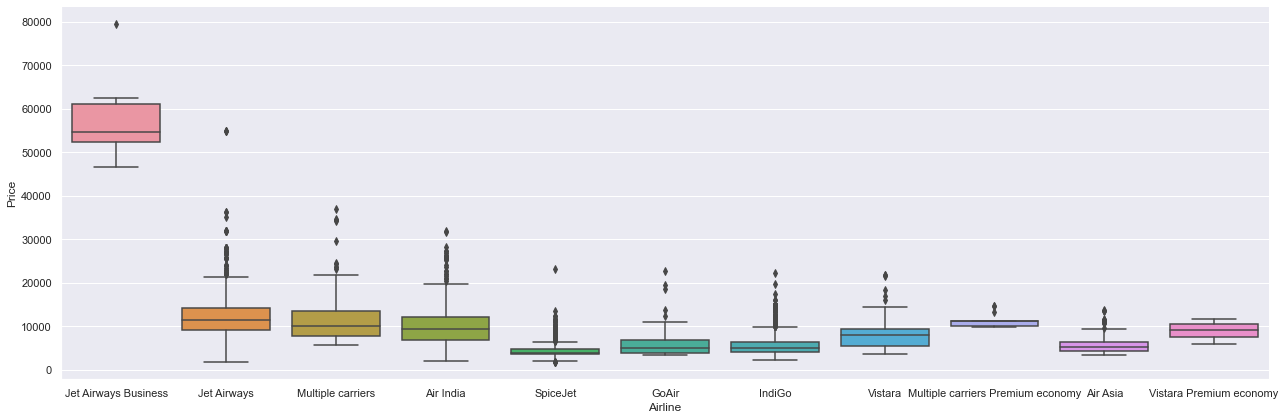

In [45]:
# From graph we can see that Jet Airways Business have the highest Price. ~80k
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="box", height = 6, aspect = 3)
plt.show()

train data 10682,30 remove trujet

test 2671,28 = 'Price' is unavailable

Regression technique : assumptions: How did you assume and verify 

linearity = plot scatter

normality = plot distribution using distplot

homoscedacity = lasso regression

multicollinearity .corr()

outlier available = linear regression will not work.

# Airline column

In [46]:
Airline = train_data[["Airline"]]
Airline

,Airline
0,IndiGo
1,Air India
2,Jet Airways
3,IndiGo
4,IndiGo
...,...
10678,Air Asia
10679,Air India
10680,Jet Airways
10681,Vistara


In [47]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = pd.get_dummies(Airline, drop_first= True)

# Airline[0:13]
#drop_first means get k - 1 dummies out of k categorical columns so, 11 columns are generated, Air_Asia is skipped alphabetically

# Source

In [48]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: Source, dtype: int64

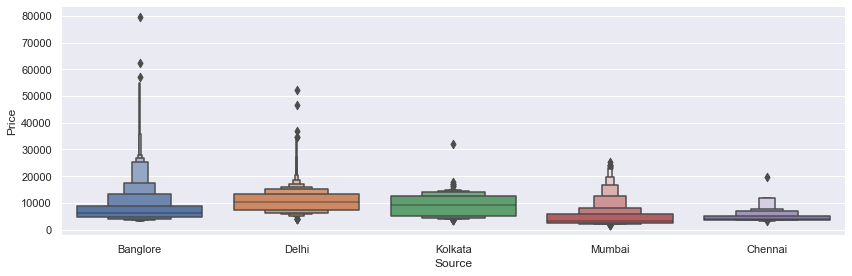

In [49]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()
#Delhi value in source column has more median as compared to rest of the values

In [50]:
Source = train_data[["Source"]]
Source

,Source
0,Banglore
1,Kolkata
2,Delhi
3,Kolkata
4,Banglore
...,...
10678,Kolkata
10679,Kolkata
10680,Banglore
10681,Banglore


In [51]:
# As Source is Nominal Categorical data we will perform OneHotEncoding
Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


# Destination column

In [52]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

In [53]:
Destination = train_data[["Destination"]]
Destination

,Destination
0,New Delhi
1,Banglore
2,Cochin
3,Banglore
4,New Delhi
...,...
10678,Banglore
10679,Banglore
10680,Delhi
10681,New Delhi


In [54]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


# Route column

In [55]:
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

In [56]:
# train_data['Additional_Info'].value_counts()
#index position

In [57]:
Addition_no_info = train_data.loc[train_data['Additional_Info'] == 'No info']

In [58]:
# 78% data is not available as in No_info
len(Addition_no_info)/ len(train_data) * 100

78.11066379552476

In [59]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Route and Additional info columns are dropped

# Total_Stops

In [60]:
train_data["Total_Stops"].value_counts()

1 stop      5624
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [61]:
train_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [62]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys
# to replace use replace() method
train_data.replace(['non-stop','1 stop','2 stops','3 stops','4 stops'],[0,1,2,3,4], inplace = True)
#doubt : label encodeing returns float values

In [63]:
train_data

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,11,30,14,10,2,40


# concatenate dataframes : train_data, Airline,Source,Destination

In [64]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [65]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [66]:
data_train.shape

(10681, 32)

In [67]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [68]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [69]:
data_train.shape

(10681, 29)

---

## Test set

In [70]:
test_data = pd.read_excel(r"Test_set (1).xlsx")

In [71]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [72]:
test_data.shape

(2671, 10)

In [73]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)

print(test_data.isnull().sum())

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

# EDA of Test data

**Date_of_Journey**

In [74]:
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [75]:
test_data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,6,6
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,27,3
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,6,3
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,6,3


**Departure_time**

In [76]:
# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [77]:
test_data

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:25 07 Jun,23h 55m,1 stop,No info,6,6,20,30
2667,IndiGo,Kolkata,Banglore,CCU → BLR,16:55,2h 35m,non-stop,No info,27,3,14,20
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Mar,6h 35m,1 stop,No info,6,3,21,50
2669,Air India,Delhi,Cochin,DEL → BOM → COK,19:15,15h 15m,1 stop,No info,6,3,4,0


**Arrival Time**

In [78]:
# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [79]:
test_data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,1 stop,No info,6,6,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,27,3,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,1 stop,No info,6,3,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,1 stop,No info,6,3,4,0,19,15


**Duration**

In [80]:
# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

In [81]:
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [82]:
# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)

In [83]:
test_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


**Converting Categorical data into Numeric data**

**Airline Column**

In [84]:
print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

Airline
---------------------------------------------------------------------------
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64


In [85]:
Airline

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2666,1,0,0,0,0,0,0,0,0,0
2667,0,0,1,0,0,0,0,0,0,0
2668,0,0,0,1,0,0,0,0,0,0
2669,1,0,0,0,0,0,0,0,0,0


**Source Column**

In [86]:
print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

Source
---------------------------------------------------------------------------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64


In [87]:
Source

,Chennai,Delhi,Kolkata,Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0
...,...,...,...,...
2666,0,0,1,0
2667,0,0,1,0
2668,0,1,0,0
2669,0,1,0,0


**Destination**

In [88]:
print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

Destination
---------------------------------------------------------------------------
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


In [89]:
Destination

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
2666,0,0,0,0,0
2667,0,0,0,0,0
2668,1,0,0,0,0
2669,1,0,0,0,0


In [90]:
test_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

# Drop columns Route, Additional_Info

In [91]:
# 78% data is not available as in No_info
Addition_no_info_test = test_data.loc[test_data['Additional_Info'] == 'No info']
len(Addition_no_info)/ len(train_data) * 100

78.11066379552476

In [92]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [93]:
test_data.head(3)

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1 stop,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1 stop,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1 stop,21,5,19,15,19,0,23,45


In [94]:
# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [95]:
test_data.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50


# Concatenate dataframe --> test_data + Airline + Source + Destination

In [96]:
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

In [97]:
data_test.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [98]:
data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [99]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [100]:
data_test.shape

(2671, 28)

In [101]:
data_train.shape

(10681, 29)

In [102]:
data_train.columns
#remove trujet

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [103]:
data_test.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata',
       'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

---

## Feature Selection

Finding out the best feature which will contribute and have good relation with target variable.
Following are some of the feature selection methods,

**Feature selection methods**


1. <span style="color: purple;">**heatmap**</span>
2. <span style="color: purple;">**feature_importance_**</span>


In [104]:
data_train.shape

(10681, 29)

In [105]:
# train_data.shape

In [106]:
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_mins'],
      dtype='object')

In [107]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [108]:
data_train.iloc[0:5,0:9]
#slicing

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours
0,0,3897,24,3,22,20,1,10,2
1,2,7662,1,5,5,50,13,15,7
2,2,13882,9,6,9,25,4,25,19
3,1,6218,12,5,18,5,23,30,5
4,1,13302,1,3,16,50,21,35,4


In [109]:
data_train

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [110]:
data_train.loc[:,'Price']

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10681, dtype: int64

**Divide training data into Independent and dependent variables**

In [111]:
X = data_train.loc[:,['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]
X.head()
# using loc we mentioned labels of features
#labels = names of columns
#independent feature = X
#dependent feature = y

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [112]:
X.shape

(10681, 28)

In [113]:
y = data_train.iloc[:, 1]
y.head()
#iloc specifies rows and columns by their integer position values

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [114]:
y.shape

(10681,)

In [115]:
data_train.corr()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Total_Stops,1.000000,0.603958,-0.009429,0.054425,-0.061479,-0.002593,0.038130,-0.106933,0.739964,-0.136692,0.271109,-0.060107,-0.302983,0.215088,0.017877,0.118409,0.009090,-0.274346,-0.120442,-0.020459,-0.234754,0.490210,0.032776,-0.261020,0.490210,-0.447385,-0.261020,-0.234754,-0.015295
Price,0.603958,1.000000,-0.153877,-0.103807,0.006809,-0.024564,0.024284,-0.086189,0.508737,-0.124944,0.050390,-0.095170,-0.361143,0.416082,0.253314,0.139766,0.017647,-0.296611,-0.060679,-0.000456,-0.179252,0.270613,0.009297,-0.230542,0.270613,-0.313472,-0.230542,-0.179252,0.189757
Journey_day,-0.009429,-0.153877,1.000000,-0.038486,0.002177,-0.008257,-0.003213,-0.017534,-0.022132,-0.009005,-0.032528,-0.003134,0.007241,-0.017368,-0.031716,0.042135,0.030837,0.022131,-0.013188,-0.020117,0.006595,0.100024,-0.060612,-0.013726,0.100024,0.002601,-0.013726,0.006595,-0.075283
Journey_month,0.054425,-0.103807,-0.038486,1.000000,0.039143,-0.059418,-0.003874,-0.100676,0.016026,-0.041010,-0.046046,-0.004513,-0.048577,0.059640,-0.034794,0.053642,-0.051232,-0.012018,-0.017284,-0.019801,0.005624,0.139122,0.087104,-0.038862,0.139122,0.090449,-0.038862,0.005624,-0.453776
Dep_hour,-0.061479,0.006809,0.002177,0.039143,1.000000,-0.024738,0.005176,0.067914,0.002876,-0.023702,-0.012875,-0.016372,-0.023391,0.113951,-0.007523,-0.149990,-0.028672,-0.010448,0.023908,-0.003375,-0.014845,-0.118777,0.155478,-0.017335,-0.118777,0.009472,-0.017335,-0.014845,-0.022135
Dep_min,-0.002593,-0.024564,-0.008257,-0.059418,-0.024738,1.000000,0.043162,-0.017625,-0.022188,0.092416,-0.045733,0.076742,-0.014762,0.024384,0.009166,-0.109410,-0.004628,0.092612,-0.077928,-0.011383,0.067095,-0.085625,-0.024298,0.038099,-0.085625,0.003164,0.038099,0.067095,0.107105
Arrival_hour,0.038130,0.024284,-0.003213,-0.003874,0.005176,0.043162,1.000000,-0.154355,0.055309,-0.118285,0.088890,0.018531,-0.071474,-0.027351,-0.014455,0.067943,0.013492,-0.090049,0.068842,0.000776,-0.014788,-0.006759,0.054716,-0.033671,-0.006759,-0.030854,-0.033671,-0.014788,0.000377
Arrival_min,-0.106933,-0.086189,-0.017534,-0.100676,0.067914,-0.017625,-0.154355,1.000000,-0.074475,0.151612,0.061220,0.096836,0.035112,-0.057720,0.005231,-0.167466,-0.001787,0.012535,0.069416,0.000314,-0.030498,-0.209913,0.118560,0.081352,-0.209913,0.095242,0.081352,-0.030498,0.021263
Duration_hours,0.739964,0.508737,-0.022132,0.016026,0.002876,-0.022188,0.055309,-0.074475,1.000000,-0.126539,0.261683,-0.094058,-0.346284,0.307154,-0.011849,-0.008099,-0.002274,-0.263877,-0.020376,-0.016270,-0.186690,0.299770,0.123482,-0.233189,0.299770,-0.346235,-0.233189,-0.186690,0.004027
Duration_mins,-0.136692,-0.124944,-0.009005,-0.041010,-0.023702,0.092416,-0.118285,0.151612,-0.126539,1.000000,-0.033461,0.067207,0.119786,-0.084112,-0.002324,-0.118797,-0.006856,0.041299,0.041937,0.004951,-0.098840,-0.154199,0.013717,-0.018495,-0.154199,0.218188,-0.018495,-0.098840,0.079846


**0.7399 between Duration_hours and Total_Stops**

**0.603 between Price and total_stops**

**0.508 between Price and Duration Hours**

In [116]:
# Finds correlation between Independent and dependent attributes

# plt.figure(figsize = (10,10))
# sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

# plt.show()

**Finding highly correlated independent variables**

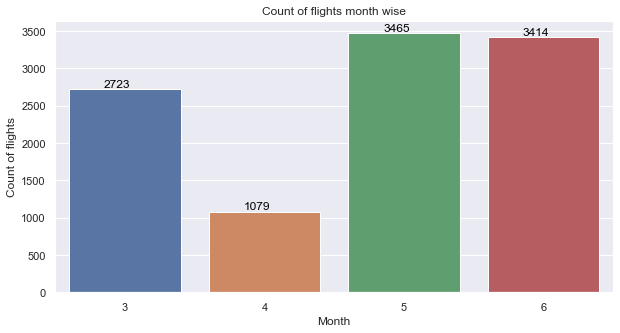

In [117]:
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_month', data = train_data)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

In [121]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [122]:
selection.feature_importances_

array([2.37992615e-01, 1.43966280e-01, 5.36728364e-02, 2.51942494e-02,
       2.10754747e-02, 2.80751756e-02, 1.95405282e-02, 9.78254733e-02,
       1.76093750e-02, 8.85559289e-03, 1.80237458e-03, 1.67860947e-02,
       1.49964924e-01, 6.70946164e-02, 1.99031470e-02, 8.82219880e-04,
       2.88851537e-03, 4.87746749e-03, 9.65419879e-05, 4.28347952e-04,
       9.30111694e-03, 3.10626710e-03, 8.15480289e-03, 1.02303719e-02,
       1.85235645e-02, 6.58940676e-03, 5.11938956e-04, 2.50506817e-02])

In [123]:
print(selection.feature_importances_)
#are these values gini importance?

[2.37992615e-01 1.43966280e-01 5.36728364e-02 2.51942494e-02
 2.10754747e-02 2.80751756e-02 1.95405282e-02 9.78254733e-02
 1.76093750e-02 8.85559289e-03 1.80237458e-03 1.67860947e-02
 1.49964924e-01 6.70946164e-02 1.99031470e-02 8.82219880e-04
 2.88851537e-03 4.87746749e-03 9.65419879e-05 4.28347952e-04
 9.30111694e-03 3.10626710e-03 8.15480289e-03 1.02303719e-02
 1.85235645e-02 6.58940676e-03 5.11938956e-04 2.50506817e-02]


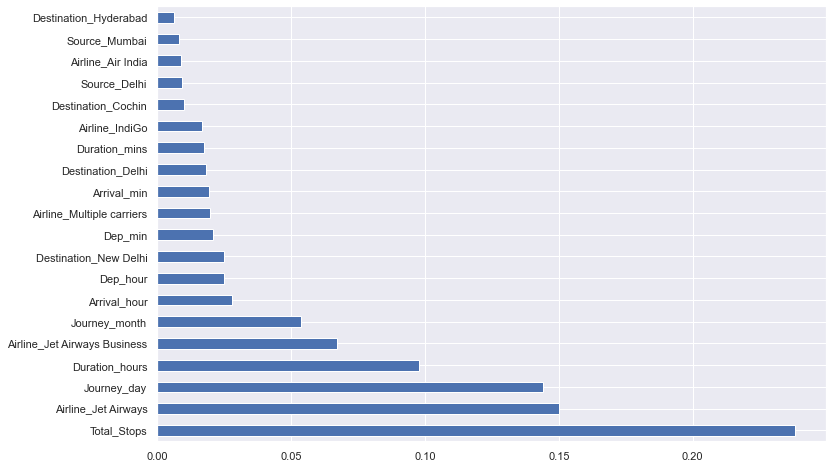

In [124]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()
#cutoff 0.4

**we have found important features by using extratreeregressor.They are Total_stops, Airline_Jet Airways, Duration_hours, Airline_JetAirwaysBusiness**

---

## Fitting model using Random Forest

1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
    * Scaling is not done in Random forest
3. Import model
4. Fit the data
5. Predict w.r.t X_test
6. In regression check **RSME** Score
7. Plot graph

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [126]:
data_train.shape
#10682 rows, 80% training data, 20% is testing data

(10681, 29)

In [127]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8544, 28), (2137, 28), (8544,), (2137,))

In [129]:
import sklearn
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import mean_squared_error,r2_score

In [130]:
lr.fit(X,y)

LinearRegression()

In [131]:
linear_y_pred = lr.predict(X_test)

In [132]:
linear_y_pred

array([ 8458.39529233,  7616.10639865, 11462.68938838, ...,
        8649.59670812, 11595.74982347,  9290.5114381 ])

In [133]:
mean_squared_error(linear_y_pred,y_test)

8439991.633431176

In [134]:
r2_score(linear_y_pred,y_test) * 100

38.16787213193828

In [135]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [136]:
y_test

4831     10413
3772      4030
1523      5963
3394      6860
4170     14571
         ...  
9871      4622
10063     7452
6912      7480
8617     14151
8989     14871
Name: Price, Length: 2137, dtype: int64

In [137]:
y_pred = reg_rf.predict(X_test)

In [ ]:
# y_pred_test = reg_rf.predict(data_test)

In [138]:
y_pred

array([10145.61      ,  6709.979     , 10648.94666667, ...,
        7614.06      , 13361.68083333, 14618.72      ])

In [139]:
reg_rf.score(X_train, y_train)
#Return the coefficient of determination of the prediction.
#best possible score of R square is 1.
#It can be negative if model is worse.

0.9542994685547426

In [140]:
reg_rf.score(X_test, y_test)

0.7953277161261713

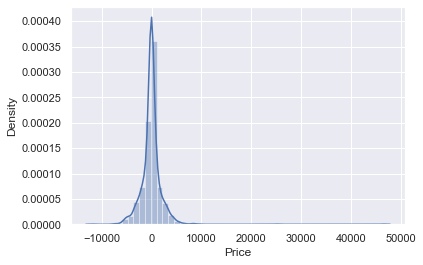

In [141]:
sns.distplot(y_test-y_pred)
plt.show()

**Distplot gives Gaussian Distribution**

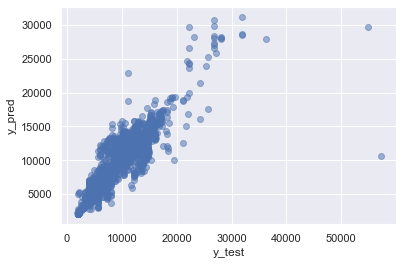

In [142]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

**scatter plot shows increasing order**

# Evaluation metric on Training data

In [143]:
from sklearn import metrics

In [144]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))# average of the summation of the squared difference
#between the actual output value and the predicted output value.
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1179.5031226855735
MSE: 4529594.386627324
RMSE: 2128.284376352776


# Normalizing RMSE value

**This produces a value between 0 and 1, where values closer to 0 represent better fitting models.**

In [ ]:
print(169.5664/(max(y)-min(y)))

In [145]:
# RMSE/(max(DV)-min(DV))

print(2090.5509/(max(y)-min(y)))
print(max(y)-min(y))
print(max(y))
print(min(y))
print(2100.0248/(max(y)-min(y)))
# range from 1759/- to 79512/- , RMSE 2100

0.026887077025966846
77753
79512
1759
0.02700892312836804


**RMSE value is 2100 and our range of price is 1759/- to 79512/-, Lets do hyperparameter tuning** 

In [146]:
metrics.r2_score(y_test, y_pred)
#high value of r2 means less difference between predicted and actual values

0.7953277161261713

In [147]:
r2_score(y_test,y_pred) * 100

79.53277161261713

# Evaluation of model on test dataset

In [148]:
y_pred_test = selection.predict(data_test)

In [149]:
y_pred_test1 = reg_rf.predict(data_test)

In [150]:
y_pred_test1

array([10720.61      ,  4253.88      , 14990.38180952, ...,
       15417.36166667, 14853.18      ,  7344.43      ])

In [151]:
y_pred_test

array([10262.  ,  4226.  , 14451.75, ..., 13843.  , 14445.75,  7272.04])

In [152]:
y_pred_test.shape

(2671,)

In [153]:
data_test.shape

(2671, 28)

---

## Hyperparameter Tuning


* Choose following method for hyperparameter tuning
    1. **RandomizedSearchCV** --> Fast
    2. **GridSearchCV**
* Assign hyperparameters in form of dictionary
* Fit the model
* Check best paramters and best score

In [154]:
from sklearn.model_selection import RandomizedSearchCV

In [155]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [156]:
n_estimators

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

In [157]:
max_features

['auto', 'sqrt']

In [158]:
max_depth

[5, 10, 15, 20, 25, 30]

In [159]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [160]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, 
                               param_distributions = random_grid,scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [161]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [162]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [163]:
prediction = rf_random.predict(X_test)

In [164]:
prediction

array([ 9855.64990629,  5782.7035917 ,  9790.30620165, ...,
        7593.70517013, 12750.02016721, 14179.70734407])

In [165]:
y_test-prediction

4831      557.350094
3772    -1752.703592
1523    -3827.306202
3394     -364.703522
4170     1929.220644
            ...     
9871     -932.092448
10063     737.377159
6912     -113.705170
8617     1400.979833
8989      691.292656
Name: Price, Length: 2137, dtype: float64

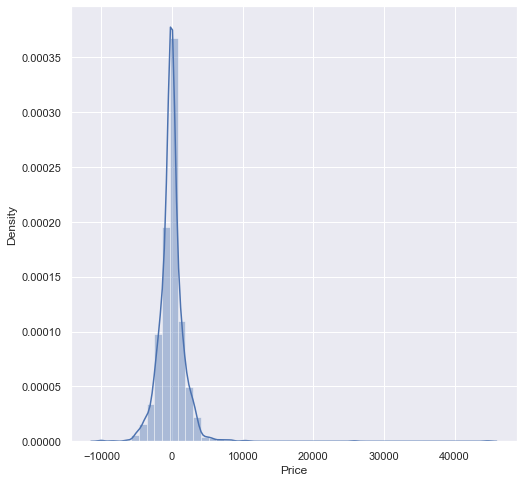

In [166]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

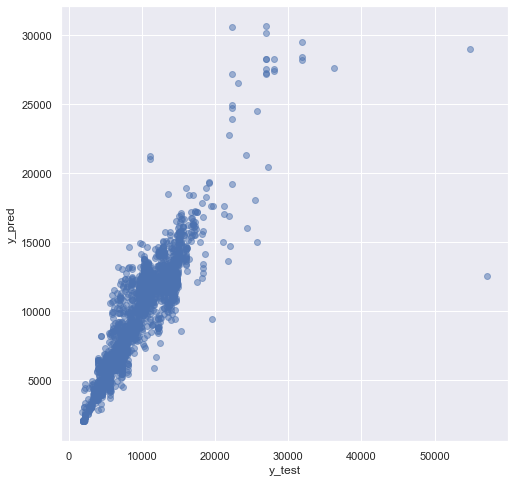

In [167]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [168]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1143.9877270361949
MSE: 4034024.202199012
RMSE: 2008.488038848878


In [169]:
r2_score(y_test,prediction)

0.8177203351576161

---